In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [115]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
hist_df=pd.read_csv("historical_user_logs.csv")

In [132]:
test_df.columns

Index(['session_id', 'DateTime', 'user_id', 'product', 'campaign_id',
       'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'gender', 'age_level', 'user_depth',
       'city_development_index', 'var_1', 'source'],
      dtype='object')

In [116]:
train_df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [133]:
train_df['is_click'].unique()

array([0, 1], dtype=int64)

In [117]:
train_df.columns

Index(['session_id', 'DateTime', 'user_id', 'product', 'campaign_id',
       'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'gender', 'age_level', 'user_depth',
       'city_development_index', 'var_1', 'is_click'],
      dtype='object')

In [118]:
train_df.shape

(463291, 15)

In [119]:
train_df["source"] = "train"
test_df["source"] = "test"

In [122]:
dataf = pd.concat([train_df,test_df],axis=0)

In [123]:
dataf.isnull().sum()

DateTime                       0
age_level                  23927
campaign_id                    0
city_development_index    159738
gender                     23927
is_click                  128858
product                        0
product_category_1             0
product_category_2        442025
session_id                     0
source                         0
user_depth                 23927
user_group_id              23927
user_id                        0
var_1                          0
webpage_id                     0
dtype: int64

In [124]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592149 entries, 0 to 128857
Data columns (total 16 columns):
DateTime                  592149 non-null object
age_level                 568222 non-null float64
campaign_id               592149 non-null int64
city_development_index    432411 non-null float64
gender                    568222 non-null object
is_click                  463291 non-null float64
product                   592149 non-null object
product_category_1        592149 non-null int64
product_category_2        150124 non-null float64
session_id                592149 non-null int64
source                    592149 non-null object
user_depth                568222 non-null float64
user_group_id             568222 non-null float64
user_id                   592149 non-null int64
var_1                     592149 non-null int64
webpage_id                592149 non-null int64
dtypes: float64(6), int64(6), object(4)
memory usage: 76.8+ MB


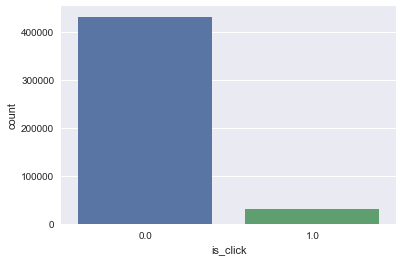

In [174]:
sns.countplot(data=dataf,x='is_click')

In [125]:
dataf.age_level.unique()

array([ 4.,  2.,  3.,  1., nan,  5.,  6.,  0.])

In [126]:
dataf.city_development_index.unique()

array([ 3., nan,  2.,  4.,  1.])

In [127]:
dataf.gender.unique()

array(['Female', 'Male', nan], dtype=object)

In [150]:
dataf_one_hot = pd.get_dummies(dataf['product'])

In [128]:
dataf.user_depth.unique()

array([ 3.,  2., nan,  1.])

In [129]:
dataf=dataf.drop('var_1',axis=1)
dataf.user_group_id.fillna(0, inplace=True)
dataf.product_category_2.fillna(0, inplace=True)
dataf['gender'] = dataf['gender'].fillna( dataf['gender'].mode().values[0] )
dataf['age_level'] = dataf['age_level'].fillna(dataf['age_level'].median())
dataf['user_depth'] = dataf['user_depth'].fillna( dataf['user_depth'].median())
dataf['city_development_index'] = dataf['city_development_index'].fillna( dataf['city_development_index'].median())
dataf['product'] = dataf['product'].map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9}).astype(np.float)
dataf['gender'] = dataf['gender'].map({'Female':0,'Male':1}).astype(np.float)

In [156]:
dataf=dataf.drop('DateTime',axis=1)

In [157]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592149 entries, 0 to 128857
Data columns (total 14 columns):
age_level                 592149 non-null float64
campaign_id               592149 non-null int64
city_development_index    592149 non-null float64
gender                    592149 non-null float64
is_click                  463291 non-null float64
product                   592149 non-null float64
product_category_1        592149 non-null int64
product_category_2        592149 non-null float64
session_id                592149 non-null int64
source                    592149 non-null object
user_depth                592149 non-null float64
user_group_id             592149 non-null float64
user_id                   592149 non-null int64
webpage_id                592149 non-null int64
dtypes: float64(8), int64(5), object(1)
memory usage: 87.8+ MB


In [158]:
dataf.isnull().sum()

age_level                      0
campaign_id                    0
city_development_index         0
gender                         0
is_click                  128858
product                        0
product_category_1             0
product_category_2             0
session_id                     0
source                         0
user_depth                     0
user_group_id                  0
user_id                        0
webpage_id                     0
dtype: int64

In [159]:
train_modified = dataf[dataf.is_click.notnull()]

In [167]:
train_modified=train_modified.drop('source',axis=1)

In [161]:
test_modified = dataf.query('is_click !=0 and is_click !=1')

In [168]:
test_modified=test_modified.drop('source',axis=1)

In [163]:
test_modified=test_modified.drop('is_click',axis=1)

In [169]:
train_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463291 entries, 0 to 463290
Data columns (total 13 columns):
age_level                 463291 non-null float64
campaign_id               463291 non-null int64
city_development_index    463291 non-null float64
gender                    463291 non-null float64
is_click                  463291 non-null float64
product                   463291 non-null float64
product_category_1        463291 non-null int64
product_category_2        463291 non-null float64
session_id                463291 non-null int64
user_depth                463291 non-null float64
user_group_id             463291 non-null float64
user_id                   463291 non-null int64
webpage_id                463291 non-null int64
dtypes: float64(8), int64(5)
memory usage: 49.5 MB


In [175]:
train_modified.is_click.value_counts()

0.0    431960
1.0     31331
Name: is_click, dtype: int64

In [170]:
train_modified.to_csv("click_train_ready_for_model.csv",index=False)

In [171]:
test_modified.to_csv("click_test_ready_for_model.csv",index=False)